<a href="https://colab.research.google.com/github/MUSA-650/musa-650-spring-2025/blob/main/data_generator_example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'''This script goes along the blog post
"Building powerful image classification models using very little data"
from blog.keras.io.
It uses data that can be downloaded at:
https://www.kaggle.com/c/dogs-vs-cats/data
In our setup, we:
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created cats/ and dogs/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 12500-13499 in data/train/dogs
- put the dog pictures index 13500-13900 in data/validation/dogs
So that we have 1000 training examples for each class, and 400 validation examples for each class.
In summary, this is our directory structure:
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```
'''

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K


In [7]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/content/drive/MyDrive/CommonFiles/MUSA650-Data/catsdogs/train'
validation_data_dir = '/content/drive/MyDrive/CommonFiles/MUSA650-Data/catsdogs/validation'
test_data_dir = '/content/drive/MyDrive/CommonFiles/MUSA650-Data/catsdogs/test'
nb_train_samples = 20
nb_validation_samples = 18
nb_test_samples = 10
epochs = 5
batch_size = 10

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [10]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)



In [11]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 20 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [21]:
epochs = 15
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('/content/drive/MyDrive/CommonFiles/MUSA650-Data/catsdogs/model_trained_v1.weights.h5')

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step - accuracy: 0.5667 - loss: 0.9294 - val_accuracy: 0.6000 - val_loss: 0.7309
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 905ms/step - accuracy: 0.6000 - loss: 0.6289 - val_accuracy: 0.1000 - val_loss: 0.7795
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 462ms/step - accuracy: 0.7667 - loss: 0.5703 - val_accuracy: 0.3000 - val_loss: 0.7610
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step - accuracy: 0.7000 - loss: 0.6278 - val_accuracy: 0.3000 - val_loss: 0.7805
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.7333 - loss: 0.6236 - val_accuracy: 0.2000 - val_loss: 0.7469
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 976ms/step - accuracy: 0.7000 - loss: 0.5801 - val_accuracy: 0.3000 - val_loss: 0.8601
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 730ms/step - accuracy: 0.6333 - loss: 0.4529 - val_accuracy: 0.3000 - val_loss: 0.8345
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 845ms/step - accuracy: 0.8000 - loss: 0.4848 - val_accuracy: 0.4000 - val_loss:

In [22]:
model.evaluate(validation_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2148 - loss: 0.7978


[0.8029210567474365, 0.2222222238779068]

In [23]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 10 images belonging to 2 classes.


In [24]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9000 - loss: 0.5275
Test accuracy: 0.8999999761581421


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Confusion matrix, without normalization
[[2 3]
 [2 3]]


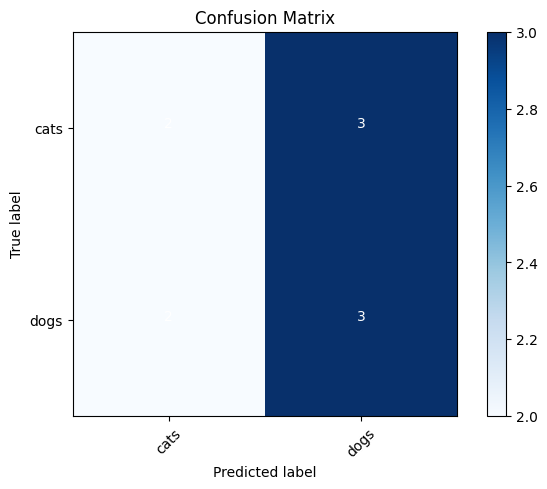

In [25]:
# prompt: can you show a confusion matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have your predictions and true labels in these variables
# Replace these with your actual predictions and true labels from the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes  # Get true labels from the generator


# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)


# Plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Example usage:
class_names = ['cats', 'dogs'] # Your class names
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix')
plt.show()


Example of a misclassified cat: cats/cat.1701.jpg


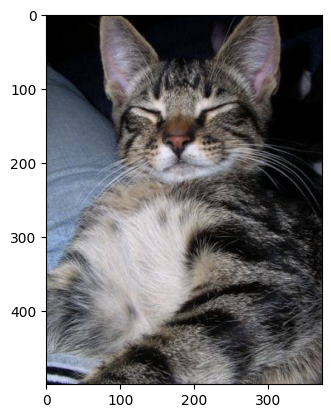

In [26]:
# prompt: show example of misclassified cat

import matplotlib.pyplot as plt
import numpy as np
# Find indices of misclassified cats
misclassified_cat_indices = np.where((y_true == 0) & (y_pred_classes == 1))[0]

# If misclassified cats exist
if len(misclassified_cat_indices) > 0:
    # Example: show the first misclassified cat
    misclassified_cat_index = misclassified_cat_indices[0]

    # Assuming test_generator has a filenames attribute
    misclassified_image_path = test_generator.filenames[misclassified_cat_index]
    print(f"Example of a misclassified cat: {misclassified_image_path}")

    # Display the image
    import matplotlib.image as mpimg
    img = mpimg.imread(test_data_dir + '/' + misclassified_image_path)
    imgplot = plt.imshow(img)
    plt.show()

else:
    print("No cats were misclassified.")


Example of a correctly classified cat: cats/cat.1700.jpg


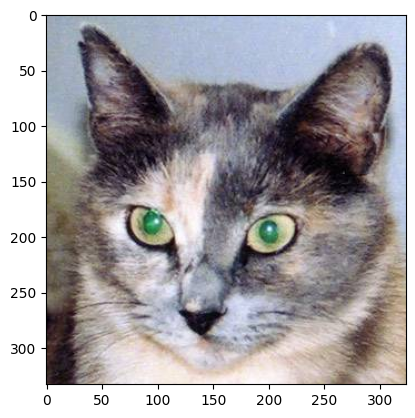

In [27]:
# prompt: show example of correctly classified cat

import matplotlib.pyplot as plt
import numpy as np
# Find indices of correctly classified cats
correctly_classified_cat_indices = np.where((y_true == 0) & (y_pred_classes == 0))[0]

# If correctly classified cats exist
if len(correctly_classified_cat_indices) > 0:
    # Example: show the first correctly classified cat
    correctly_classified_cat_index = correctly_classified_cat_indices[0]

    # Assuming test_generator has a filenames attribute
    correctly_classified_image_path = test_generator.filenames[correctly_classified_cat_index]
    print(f"Example of a correctly classified cat: {correctly_classified_image_path}")

    # Display the image
    img = mpimg.imread(test_data_dir + '/' + correctly_classified_image_path)
    imgplot = plt.imshow(img)
    plt.show()

else:
    print("No cats were correctly classified.")
